In [4]:
# Exploratory Analysis

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline

In [29]:
nRowsRead = None # specify 'None' if want to read whole file
#df1 = pd.read_csv()
df1 = pd.read_csv("/Users/priyanshusankhala/Downloads/onehundred.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'companies_sorted.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 396 rows and 14 columns


In [30]:
#df1 = pd.read_csv('../input/companies_sorted.csv', delimiter=',', nrows = nRowsRead)

In [31]:
df1.dataframeName = 'onehundred.csv'

In [32]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [33]:
df1.head()

,Company Name,Company url,Rank of page,Appeared in Title,Ttile and normalized(3),Number of words in company name appering in meta tag(4),"Number of words in company name appering in meta tag,normalized(5)",Levenshtein title and name(6),Levenshtein distance(Domain-Name)7,no. of links(8),Word Count(9),Does Company name apperars in html(10),Ratio of words in the site content to all links on the page(11),Response Variable
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,1/3,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


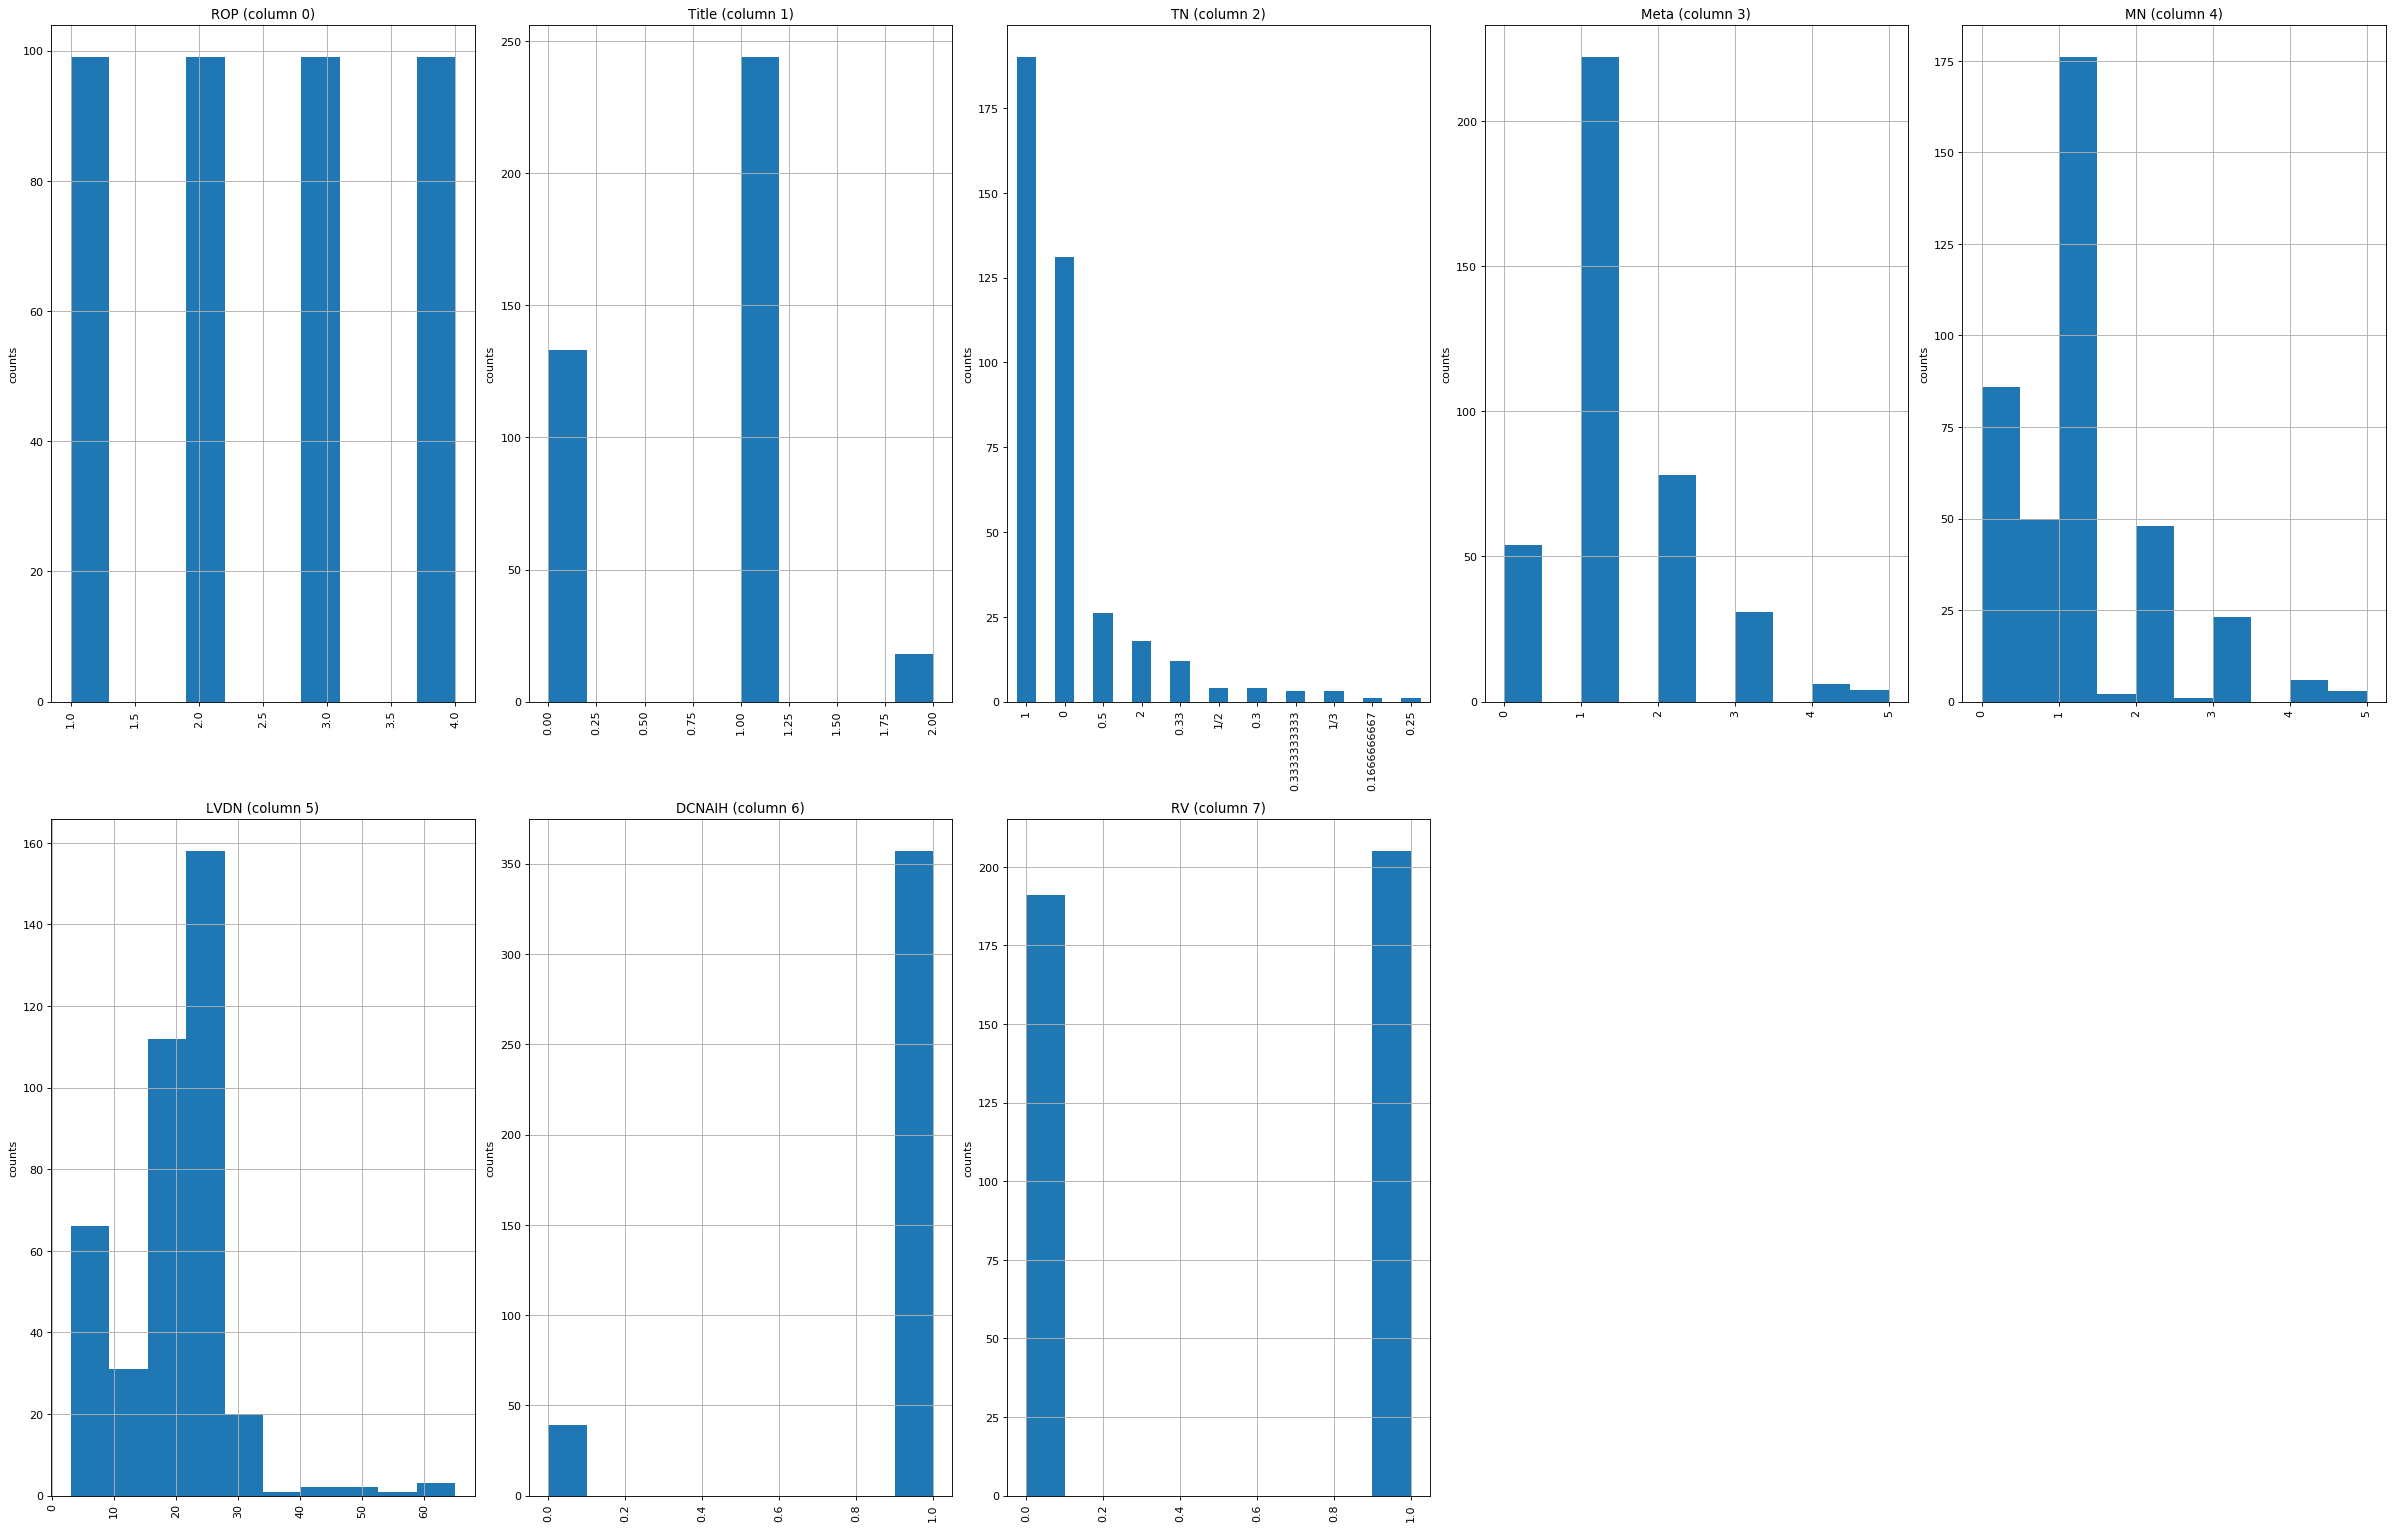

In [72]:
plotPerColumnDistribution(df1, 10, 5)

In [70]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

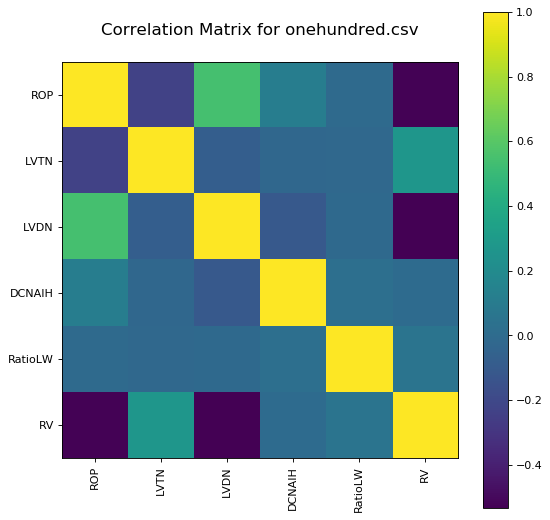

In [71]:
plotCorrelationMatrix(df1, 8)

In [68]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

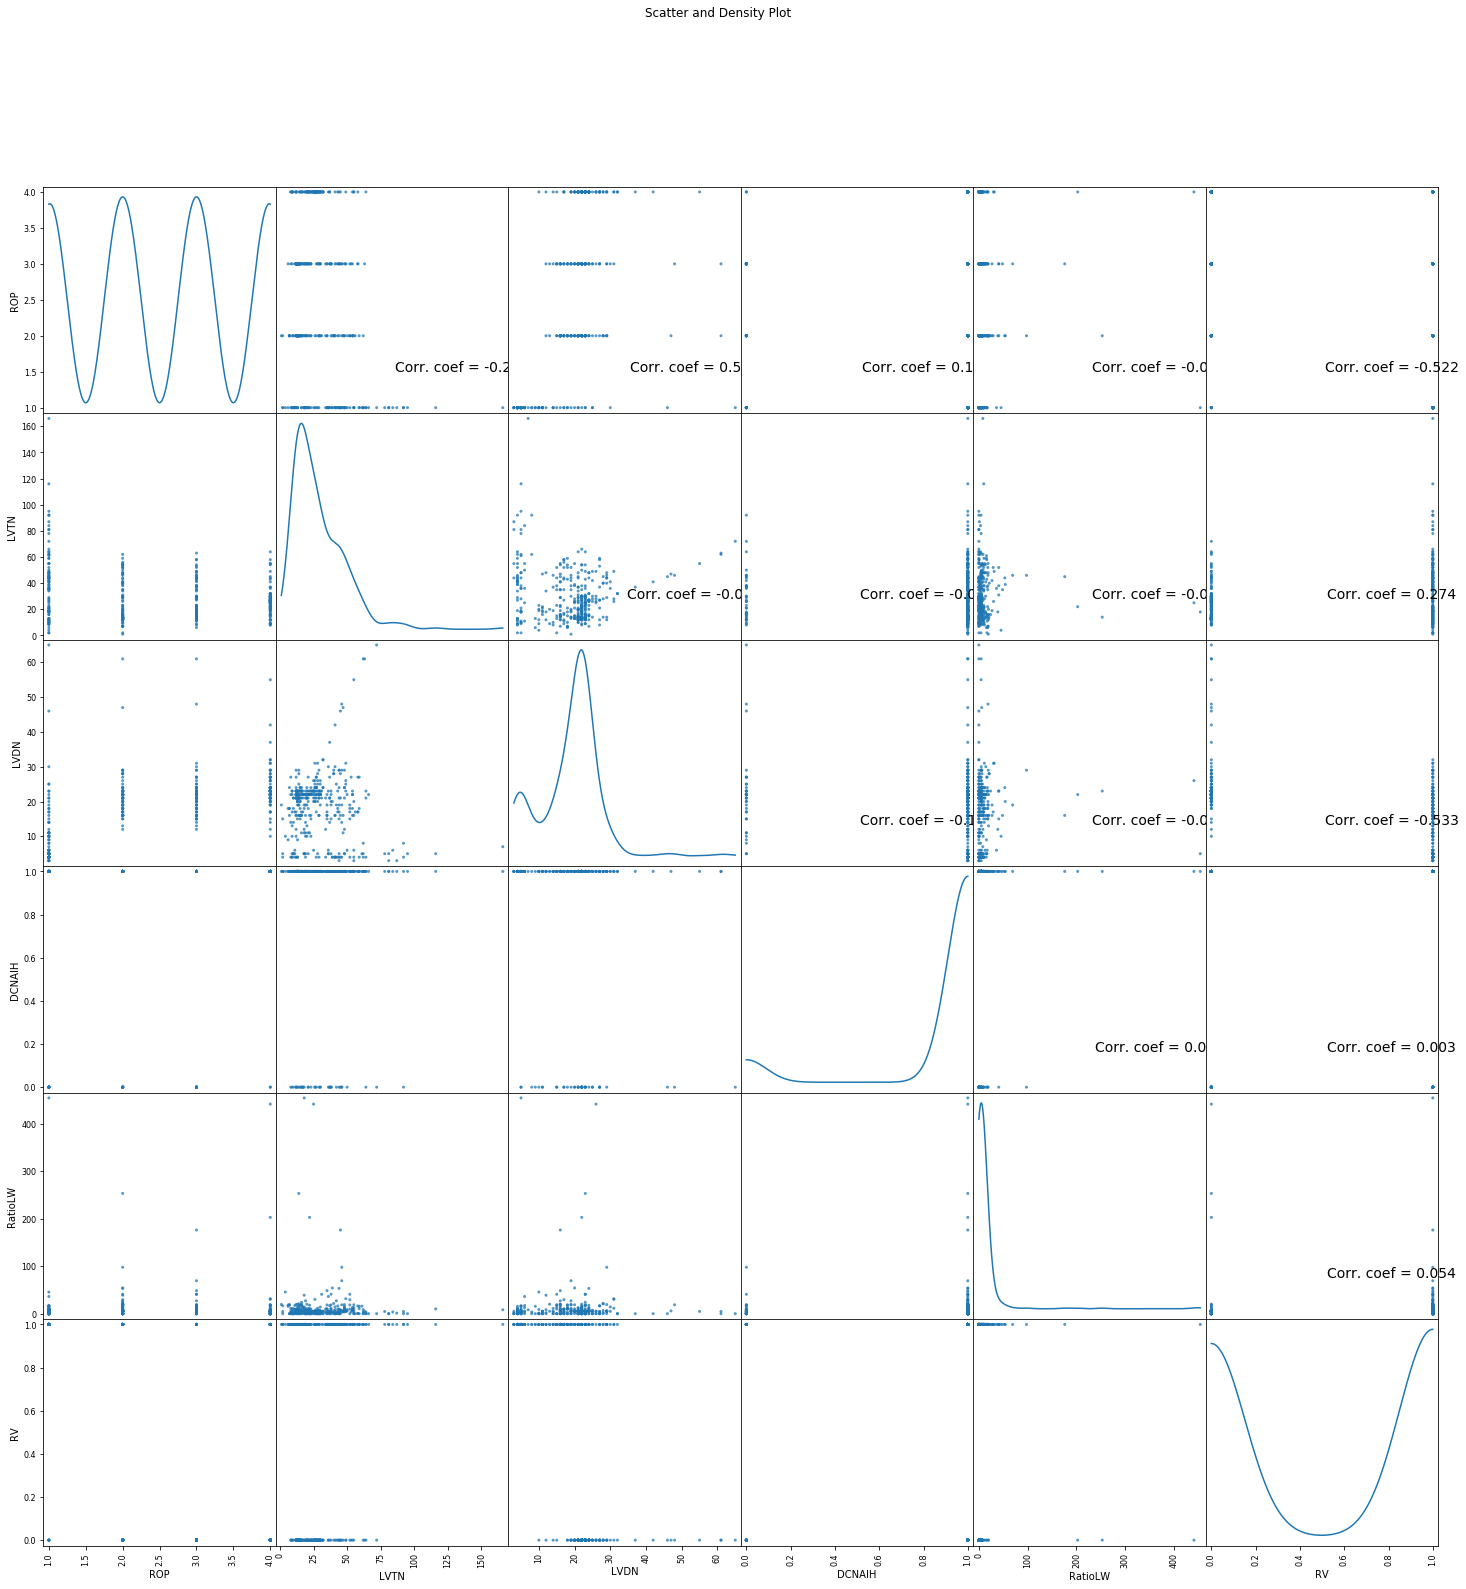

In [69]:
plotScatterMatrix(df1, 25, 14)

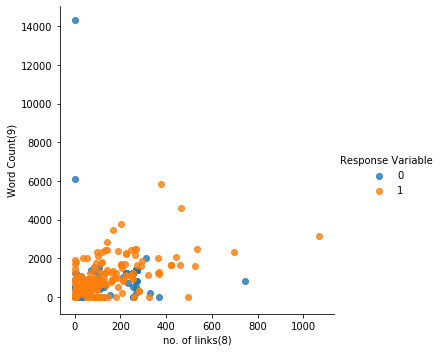

In [11]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='no. of links(8)', y='Word Count(9)', hue='Response Variable', 
           data=footballers.loc[footballers['Response Variable'].isin(['1', '0', '2'])], 
           fit_reg=False)

In [18]:
# # from pandas.plotting import parallel_coordinates

# # p = (df1[(df1['Response Variable'].isin(["1", "0"]))]
# #          .loc[:, ['Response Variable''Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)']]
# #     )

# # parallel_coordinates(p, 'Response Variable')
# import plotly.express as px
# df1 = px.data.df1
# fig = px.parallel_coordinates(df1, color="Response Variable", labels={"Response Variable": "Response",
#                 "Rank of page": "Rank", "Appeared in Title": "Title",
#                 "Levenshtein distance(Domain-Name)7": "LV DIS", "no. of links(8)": "total links", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

AttributeError: module 'plotly.express.data' has no attribute 'df1'

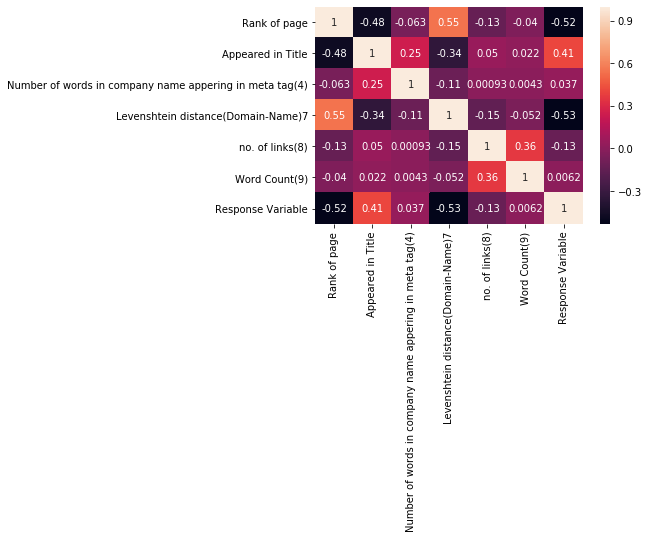

In [14]:

# sns.heatmap(
#     df1.loc[:, ['Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)', 'Response Variable']].corr(),
#     annot=True
# )

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

from math import pi
from pandas.plotting import parallel_coordinates
# import plotly.graph_objs as go
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# importing libraries for plot
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [44]:
# Rename all columns
df2 = df1.rename(columns= {"Rank of page": "ROP",
                     "Appeared in Title":"Title",
                     "Number of words in company name appering in meta tag(4)":"Meta",
                     "Ttile and normalized(3)":"TN",
                     "Number of words in company name appering in meta tag,normalized(5)":"MN",
                     "Levenshtein title and name(6)":"LVTN",
                     "Levenshtein distance(Domain-Name)7":"LVDN",
                     "no. of links(8)":"Links",
                     "Word Count(9)":"Word",
                     "Does Company name apperars in html(10)":"DCNAIH",
                     "Ratio of words in the site content to all links on the page(11)":"RatioLW",
                     "Response Variable":"RV"},
                                 inplace = True)

In [47]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioLW,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,1/3,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


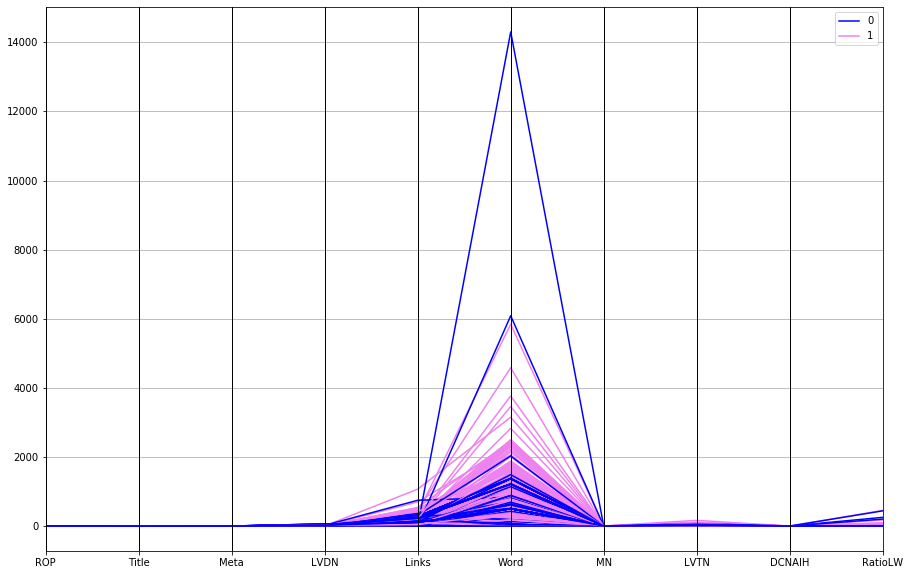

In [67]:
# Parallel Plot
d = df1[['ROP', 'Title', 'Meta', 'LVDN', 'Links', 'Word', 'MN','LVTN','DCNAIH','RatioLW','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()



In [61]:
pip install bokeh
from bokeh.charts import Scatter, output_file, show

# Construct the scatter plot
p = Scatter(iris, x='Petal_length', y='Petal_width', color="Class", title="Petal Length vs Petal Width",
            xlabel="Sepal Length", ylabel="Sepal Width")

# Output the file 
output_file('scatter.html')

# Show the scatter plot
show(p)

SyntaxError: invalid syntax (<ipython-input-61-922304e16a27>, line 1)

In [64]:
# Corelation Matrix
corrMatrix = df1.corr()
print (corrMatrix)

              ROP     Title      Meta        MN      LVTN      LVDN     Links  \
ROP      1.000000 -0.478396 -0.062635 -0.056855 -0.232457  0.545996 -0.130215   
Title   -0.478396  1.000000  0.248903  0.235578  0.126023 -0.338287  0.050133   
Meta    -0.062635  0.248903  1.000000  0.870285  0.099729 -0.109284  0.000932   
MN      -0.056855  0.235578  0.870285  1.000000  0.085359 -0.198901 -0.000944   
LVTN    -0.232457  0.126023  0.099729  0.085359  1.000000 -0.074300 -0.003301   
LVDN     0.545996 -0.338287 -0.109284 -0.198901 -0.074300  1.000000 -0.145184   
Links   -0.130215  0.050133  0.000932 -0.000944 -0.003301 -0.145184  1.000000   
Word    -0.039752  0.022462  0.004279  0.014924 -0.039076 -0.051524  0.362381   
DCNAIH   0.117493  0.430143  0.339412  0.302322 -0.022983 -0.107805  0.033546   
RatioLW -0.000528  0.017953 -0.032072 -0.049616 -0.015642 -0.011867 -0.145539   
RV      -0.522076  0.412308  0.036842  0.098136  0.273578 -0.533195 -0.125043   

             Word    DCNAIH

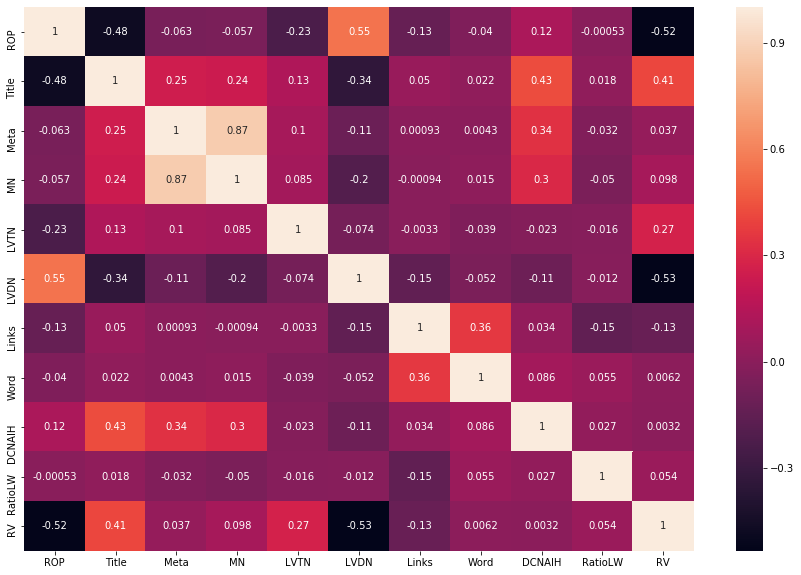

In [66]:
# Co relation Plot
plt.figure(figsize=(15, 10))
sns.heatmap(
    df1.loc[:, ['ROP', 'Title', 'Meta', 'MN', 'LVTN', 'LVDN', 'Links', 'Word', 'DCNAIH', 'RatioLW', 'RV']].corr(),
    annot=True
)